# Importing Libraries

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler

# Loading the Dataset

In [49]:
df1=pd.read_csv("btc_training.csv")

In [50]:
df2=pd.read_csv("btc_test.csv")

# Analysing the Patterns of the training Dataset

In [5]:
df1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-01,430.721008,436.246002,427.515015,434.334015,434.334015,36278900
1,2016-01-02,434.622009,436.062012,431.869995,433.437988,433.437988,30096600
2,2016-01-03,433.578003,433.743011,424.705994,430.010986,430.010986,39633800
3,2016-01-04,430.061005,434.516998,429.084015,433.091003,433.091003,38477500
4,2016-01-05,433.069000,434.182007,429.675995,431.959991,431.959991,34522600


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2193 non-null   object 
 1   Open       2193 non-null   float64
 2   High       2193 non-null   float64
 3   Low        2193 non-null   float64
 4   Close      2193 non-null   float64
 5   Adj Close  2193 non-null   float64
 6   Volume     2193 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 120.1+ KB


5 float datatype column and 1 object and 1 integer datatype column present in the dataset.

In [7]:
# Checking shape
df1.shape

(2193, 7)

2193 rows and 7 columns present in the dataset.

In [8]:
# Checking Null values
df1.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Null values are present most of the columns.

In [9]:
# Handling the Date column
df1["Date"] = pd.to_datetime(df1["Date"])
df1["Year"]= df1["Date"].dt.year
df1["Month"]= df1["Date"].dt.month
df1["Day"]= df1["Date"].dt.day


So now we have extracted the Year, Month and Day from the Date Column.


In [10]:
# Deleting Date Column
del df1['Date']

In [11]:
df1.shape

(2193, 9)

Now 2193 rows and 9 columns present in the Dataset.

# EDA Nominal data

In [12]:
df1.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Year', 'Month',
       'Day'],
      dtype='object')

2016    366
2020    366
2018    365
2017    365
2019    365
2021    365
2022      1
Name: Year, dtype: int64


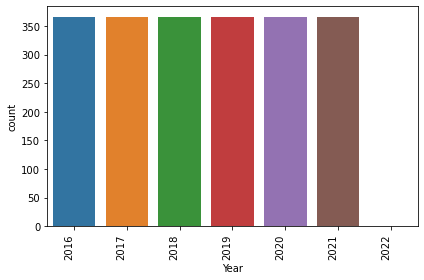

In [13]:
ax=sns.countplot(x='Year',data=df1)
print(df1['Year'].value_counts())
ax.set_xticklabels(ax.get_xticklabels(),rotation=90, ha='right')
plt.tight_layout()

Year is in range from 2016 to 2022 and figure is showing that there is not much noicable difference betweeen them and 2022 is less because it just started.

1     187
8     186
10    186
12    186
3     186
5     186
7     186
4     180
6     180
9     180
11    180
2     170
Name: Month, dtype: int64


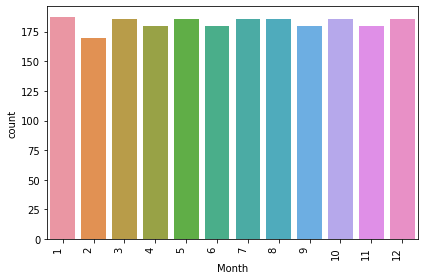

In [14]:
ax=sns.countplot(x='Month',data=df1)
print(df1['Month'].value_counts())
ax.set_xticklabels(ax.get_xticklabels(),rotation=90, ha='right')
plt.tight_layout()

According to the figure there is not much differnce in any of the month.

# EDA Continuous Data

<AxesSubplot:xlabel='Open', ylabel='Density'>

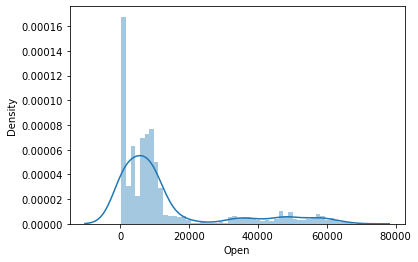

In [15]:
sns.distplot(df1['Open'])

Open is in range from 0 to 80000 and most of the amount is in range from 0 to 17000 approx.

<AxesSubplot:xlabel='High', ylabel='Density'>

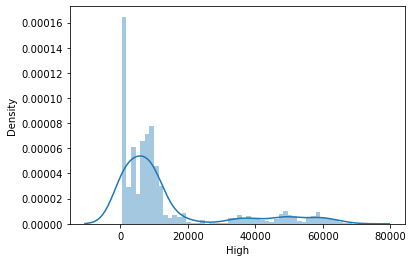

In [16]:
sns.distplot(df1['High'])

Most of the amount in High column is in range from 0 to 80000 and lesser amount is in range from 0 to 17000 approx.

<AxesSubplot:xlabel='Low', ylabel='Density'>

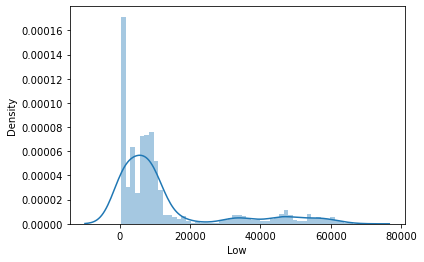

In [17]:
sns.distplot(df1['Low'])

Most of the amount in Low column is in range from 0 to 80000 and lesser amount is in range from 0 to 17000 approx.

<AxesSubplot:xlabel='Adj Close', ylabel='Density'>

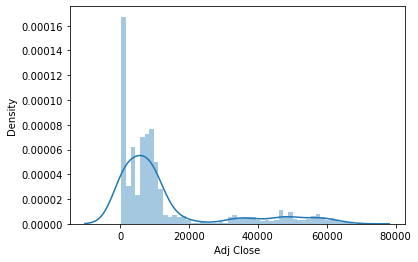

In [18]:
sns.distplot(df1['Adj Close'])

Most of the amount in Adj Close column is in range from 0 to 80000 and lesser amount is in range from 0 to 17000 approx.

# Statistical Summary

In [20]:
df1.describe()

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
count,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2.193000e+03,2193.000000,2193.000000,2193.000000
mean,13005.792871,13362.996536,12616.080147,13025.164563,13025.164563,1.757591e+10,2018.501140,6.519380,15.725946
std,16479.996404,16935.236723,15960.649705,16489.530523,16489.530523,2.085247e+10,1.709816,3.451001,8.806991
min,365.072998,374.950012,354.914001,364.330994,364.330994,2.851400e+07,2016.000000,1.000000,1.000000
25%,2577.770020,2682.260010,2510.479980,2589.409912,2589.409912,1.182870e+09,2017.000000,4.000000,8.000000
50%,7397.134277,7535.716797,7233.399414,7397.796875,7397.796875,9.175292e+09,2019.000000,7.000000,16.000000
75%,11354.299805,11570.786133,11018.129883,11358.662109,11358.662109,2.886756e+10,2020.000000,10.000000,23.000000
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11,2022.000000,12.000000,31.000000


Number of values is same in all the columns except volume.

There is some difference between mean and median(50%)

There is some difference between 75% and max.

# Checking Correlations

<AxesSubplot:>

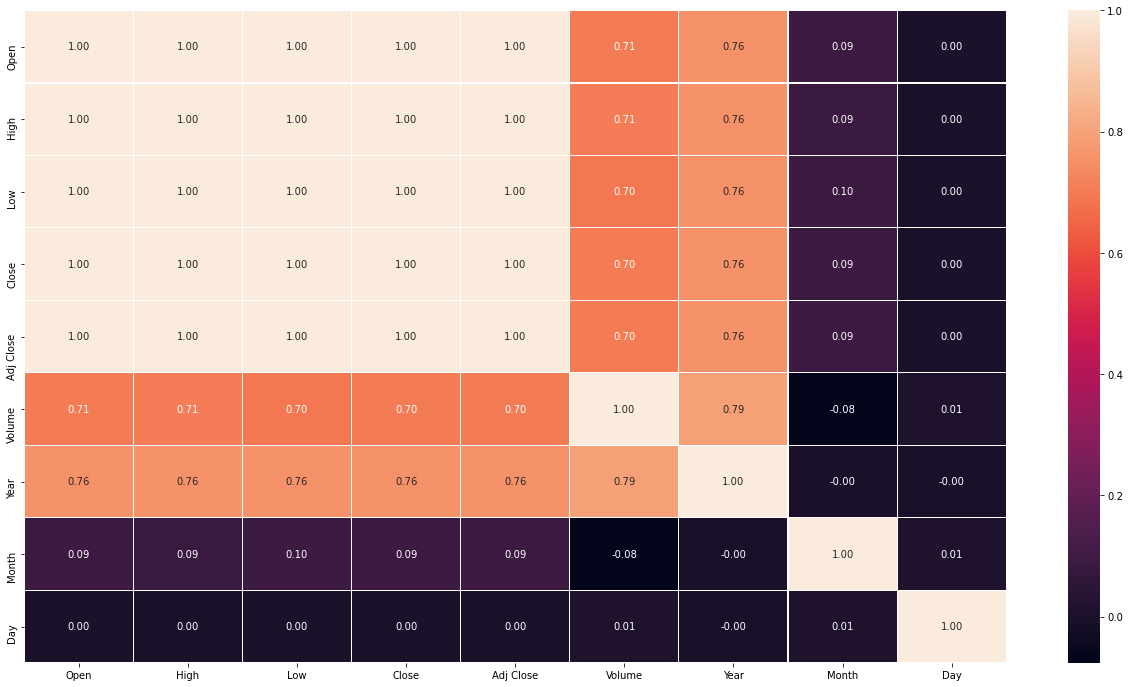

In [21]:
plt.figure(figsize=(22,12))
sns.heatmap(df1.corr(),annot=True,linewidths =0.1,fmt='0.2f')

Most of the column is positively correlated with the target column volume.

Year column is positively correlated with most of the coulmn.

# Now we need only 2 columns for model building that is open and close

In [51]:
training_set = df1.iloc[:, 1:2].values

# Feature Scaling

In [52]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Creating the Dataset with Time Steps

In [55]:
X_train = []
y_train = []
for i in range(60, 2193):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [54]:
training_set.shape

(2193, 1)

# Now Using LSTM for Model

In [56]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [57]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.25))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.25))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.25))

regressor.add(Dense(units = 1))

In [58]:
regressor.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_4 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_5 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_6 (LSTM)               (None, 50)               

In [82]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

history=regressor.fit(X_train, y_train, epochs = 30, batch_size = 32, validation_split=0.1)

Epoch 1/30
60/60 [==============================] - 91s 262ms/step - loss: 6.7370e-04 - val_loss: 0.0018
Epoch 2/30
60/60 [==============================] - 10s 159ms/step - loss: 6.7702e-04 - val_loss: 0.0066
Epoch 3/30
60/60 [==============================] - 9s 146ms/step - loss: 6.8110e-04 - val_loss: 0.0026
Epoch 4/30
60/60 [==============================] - 10s 165ms/step - loss: 6.3966e-04 - val_loss: 0.0019
Epoch 5/30
60/60 [==============================] - 9s 142ms/step - loss: 8.8919e-04 - val_loss: 0.0018
Epoch 6/30
60/60 [==============================] - 9s 157ms/step - loss: 7.2652e-04 - val_loss: 0.0021
Epoch 7/30
60/60 [==============================] - 9s 152ms/step - loss: 7.2285e-04 - val_loss: 0.0049
Epoch 8/30
60/60 [==============================] - 9s 152ms/step - loss: 6.8082e-04 - val_loss: 0.0024
Epoch 9/30
60/60 [==============================] - 10s 162ms/step - loss: 6.8927e-04 - val_loss: 0.0021
Epoch 10/30
60/60 [==============================] - 8s 140m

# Plotting the Graph

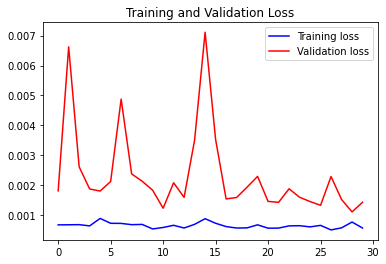

In [83]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.show()


# Prediction on Test data

In [84]:
df2

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-01,46311.746094,47827.312500,46288.484375,47686.812500,47686.812500,24582667004
1,2022-01-02,47680.925781,47881.406250,46856.937500,47345.218750,47345.218750,27951569547
2,2022-01-03,47343.542969,47510.726563,45835.964844,46458.117188,46458.117188,33071628362
3,2022-01-04,46458.851563,47406.546875,45752.464844,45897.574219,45897.574219,42494677905
4,2022-01-05,45899.359375,46929.046875,42798.222656,43569.003906,43569.003906,36851084859
5,2022-01-06,43565.511719,43748.718750,42645.539063,43160.929688,43160.929688,30208048289
6,2022-01-07,43153.570313,43153.570313,41077.445313,41557.902344,41557.902344,84196607520
7,2022-01-08,41561.464844,42228.941406,40672.277344,41733.941406,41733.941406,28066355845
8,2022-01-09,41734.726563,42663.949219,41338.160156,41911.601563,41911.601563,21294384372
9,2022-01-10,41910.230469,42199.484375,39796.570313,41821.261719,41821.261719,32104232331


In [85]:
test_data = df2.iloc[:, 1:2].values

# Applying Inverse Transfromation for obtaining the result

In [86]:
dataset_total = pd.concat((df1['Open'], df2['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(df2) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted = regressor.predict(X_test)
predicted = sc.inverse_transform(predicted)

In [87]:
predicted

array([[45988.754],
       [45687.67 ],
       [46018.777],
       [46423.652],
       [46359.258],
       [45889.414],
       [44693.598],
       [43403.19 ],
       [42061.027],
       [41148.016],
       [40826.113],
       [40867.715],
       [41326.22 ],
       [42238.71 ],
       [42630.176],
       [42729.242]], dtype=float32)

In [88]:
y_test

array([4.40311457e-02, 5.74981291e-09, 3.13418939e-11, ...,
       7.00424856e-02, 5.75836070e-09, 0.00000000e+00])

# Now Plotting the Results on Graph

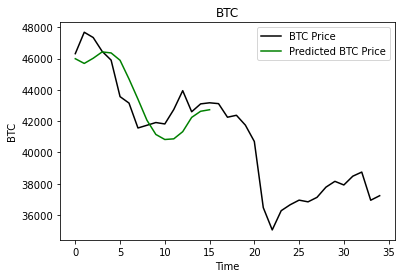

In [89]:
plt.plot(test_data, color = 'black', label = 'BTC Price')
plt.plot(predicted, color = 'green', label = 'Predicted BTC Price')
plt.title('BTC')
plt.xlabel('Time')
plt.ylabel('BTC')
plt.legend()
plt.show()

The above plot shows that BTC Price will go down and then little up and our model prediction also shows that the price will go down and little up. 